In [9]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def pair_files():
    paired_files = []
    new_files = glob.glob('new_data/*.csv')
    old_files = glob.glob('old_data/*.csv')
    for file in new_files:
        id_old = file.split("/")[1].replace(".csv","").split("_")[1]
        for old_file in old_files:
            if "/"+id_old+"_" in old_file:
                paired_files.append([file,old_file])
    return paired_files
    

In [119]:
def create_user_df_2020(file):
    df = pd.read_csv(file)
    df= df[(df['years'] == 2020)&(df['source'] == 'youtube')]
    df['datetime'] = pd.to_datetime(df.datetime)
    df = df.sort_values(by='datetime',ascending =True).reset_index()
    #print(file,"2020:",df.shape[0])
    return df

In [120]:
def create_user_df_2019(file):
    df = pd.read_csv(file)
    df= df[(df['years'] == 2019)&(df['source'] == 'youtube')&(df['months'].between(1,6))]
    df['datetime'] = pd.to_datetime(df.datetime)
    df = df.sort_values(by='datetime',ascending =True).reset_index()
    #print(file,"2019:",df.shape[0])
    return df

In [58]:
def create_session_list(month_df):
    break_time_minutes = 5
    trails = []
    current_trail = []
    for index, row in month_df.iterrows():
        if row['action'] == "Searched":
            if len(current_trail) != 0:
                trails.append(current_trail)
            current_trail = [row]
        else:
            if len(current_trail) == 0:
                current_trail.append(row)
            else:
                eventTimeDif = (row.datetime - current_trail[-1].datetime).seconds
                if (pd.notnull(current_trail[-1].durations)):
                    difComp = int(current_trail[-1].durations) + (60*break_time_minutes)
                else:
                    difComp = (60*break_time_minutes)
                if (current_trail[-1]['action'] == "Searched" and eventTimeDif < (60 * break_time_minutes)) or (eventTimeDif < difComp):
                    current_trail.append(row)
                else:
                    if len(current_trail) != 0:
                        trails.append(current_trail)
                    current_trail = [row]   
    if len(current_trail) > 1:
        trails.append(current_trail)
    return trails

In [66]:
def filter_sessions(sessions,threshold):
    filtered_sessions = []
    for session in sessions:
        if len(session) > threshold:
            filtered_sessions.append(session)
    #print("returning",len(filtered_sessions),"/",len(sessions))
    return filtered_sessions

In [72]:
def session_count_per_day(sessions):
    sessionsByDate = {}
    for session in sessions:
        if int(session[0]['datetime'].date().strftime('%j')) in list(sessionsByDate.keys()):
            sessionsByDate[int(session[0]['datetime'].date().strftime('%j'))].append(session)
        else:
            sessionsByDate[int(session[0]['datetime'].date().strftime('%j'))] = [session]
    for i in sessionsByDate.keys():
        sessionsByDate[i] = len(sessionsByDate[i])
    return sessionsByDate

In [61]:
def plot_dic(dic): 
    lists = sorted(dic.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.rcParams["figure.figsize"] = (15,5)
    #plt.xticks(np.arange(0,20, 1.0))
    #plt.axvline(x=10, ymin=0, ymax=1,color= "red")
    #plt.title('My title')
    #plt.xlabel('Week Number')
    #plt.ylabel(y_axis)
    
    #plt.ylim(0,y_lim)
    #plt.xlim(0,20)
    plt.show()


In [101]:
def plot_dic_two(dic,dictwo): 
    lists = sorted(dic.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    liststwo = sorted(dictwo.items()) # sorted by key, return a list of tuples
    xtwo, ytwo = zip(*liststwo) # unpack a list of pairs into two tuples
    plt.rcParams["figure.figsize"] = (15,5)
    plt.plot(xtwo, ytwo)
    #plt.xticks(np.arange(0,20, 1.0))
    #plt.axvline(x=10, ymin=0, ymax=1,color= "red")
    plt.xlabel('Day of Year (Out of 365)')
    plt.ylabel("Number of Unique Sessions per Day")
    
    #plt.ylim(0,200)
    #plt.xlim(0,20)
    plt.show()

In [ ]:
user_total_sessions = []
print("Starting...")

for f in files:
    user_df = create_user_df_2020(f)
    user_sessions = create_session_list(user_df)
    user_total_sessions += user_sessions
print("Files Processed")
    
user_total_sessions_one = filter_sessions(user_total_sessions,2)
average_daily_session_length_one = session_count_per_day(user_total_sessions)

plot_dic(average_daily_session_length_one)

In [127]:
def create_month_report(trailsList):
    longest = 0
    count_five = 0
    count = 0
    total_length = 0
    for trail in trailsList:
        if len(trail) > longest:
            longest = len(trail)
        if len(trail) > 19:
            count_five += 1
        if len(trail) > 1:
            count += 1
            total_length += len(trail)
    print("'Length' refers to the number of actions included in it")
    print("Number of Sessions of length greater then 1: "+ str(count))
    print("Number of Sessions of Length Greater then 20: "+ str(count_five))
    print("Longest Session: "+ str(longest))
    print("Average number of actions in session: "+str(total_length/count))

In [109]:
def generate_num_greater_five(trails):
    trailsByDate = {}
    numPerDate = {}
    for trail in trails:
        if trail[0]['datetime'].date() in list(trailsByDate.keys()) and len(trail) > 5:
            trailsByDate[trail[0]['datetime'].date()].append(trail)
        elif len(trail) > 5:
            trailsByDate[trail[0]['datetime'].date()] = [trail]
        else:
            pass
    for trailDate in trailsByDate.keys():
        numPerDate[trailDate] = len(trailsByDate[trailDate])
    return numPerDate

2020 Summary
'Length' refers to the number of actions included in it
Number of Sessions of length greater then 1: 10271
Number of Sessions of Length Greater then 20: 78
Longest Session: 64
Average number of actions in session: 3.576282737805472
{1: 78, 2: 115, 3: 117, 40: 160, 47: 151, 75: 150, 77: 165, 78: 176, 81: 131, 86: 182, 91: 201, 95: 140, 112: 203, 26: 165, 33: 150, 35: 165, 46: 128, 54: 189, 55: 143, 57: 115, 58: 103, 79: 161, 80: 178, 82: 198, 83: 199, 90: 187, 94: 194, 111: 244, 115: 279, 116: 235, 117: 245, 118: 168, 119: 217, 120: 222, 121: 217, 122: 231, 123: 228, 124: 231, 125: 275, 126: 217, 127: 224, 128: 256, 129: 249, 130: 243, 131: 201, 132: 267, 133: 273, 134: 272, 135: 292, 136: 206, 137: 321, 138: 274, 139: 284, 140: 262, 141: 244, 142: 281, 143: 208, 144: 217, 145: 236, 146: 156, 4: 117, 5: 105, 6: 85, 7: 83, 8: 118, 9: 149, 10: 146, 11: 110, 13: 113, 14: 89, 15: 98, 16: 148, 17: 135, 18: 168, 19: 132, 20: 142, 21: 142, 22: 134, 23: 198, 24: 128, 25: 72, 27: 14

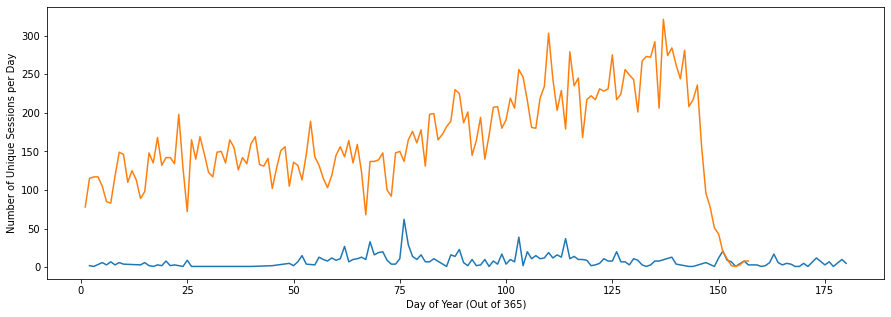

In [130]:
import pickle
paired_files = pair_files()
user_total_sessions_2019 = []
user_total_sessions_2020 = []

for file_pair in paired_files:
    user_df_2019 = create_user_df_2019(file_pair[1])
    user_sessions_2019 = create_session_list(user_df_2019)
    user_total_sessions_2019 += user_sessions_2019
    
    user_df_2020 = create_user_df_2020(file_pair[0])
    user_sessions_2020 = create_session_list(user_df_2020)
    user_total_sessions_2020 += user_sessions_2020
print("2020 Summary")
create_month_report(user_total_sessions_2020)

    
#user_total_sessions_one = filter_sessions(user_total_sessions,2)
session_count_per_day_2019 = session_count_per_day(user_total_sessions_2019)

session_count_per_day_2020 = session_count_per_day(user_total_sessions_2020)
print(session_count_per_day_2020)
pickle.dump( session_count_per_day_2020, open( "sessions2020.p", "wb" ) )
plot_dic_two(session_count_per_day_2019,session_count_per_day_2020)
